## Задача 2
С использованием python-скриптов обработать датасет, подготовленный в Задаче 1:
1. Проверить датасет на: дубликаты, пропуски, типы данных, аномальные значения. Произвести предобработку датасета, если это необходимо
2. Поделить всех учеников на волны
Критерии волн:
- 0 волна – присоединились на курс до даты старта курса включительно
- 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно
- 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса
- 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса
- 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса
- 5 волна - присоединились на курс от 4 недель после даты старта курса

Результат, который нужно прислать по задаче:
- Jupyter Notebook в формате файла .ipynb. В тетрадке оставляйте комментарии с пояснениями своих действий

### 1. Проверить датасет на: дубликаты, пропуски, типы данных, аномальные значения. Произвести предобработку датасета, если это необходимо

In [240]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv('df_result_1_task.csv')
df

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
0,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16,10001,Markova,Самара,1,2024-07-25 18:04:20,2.0,10
1,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16,10006,Пушкина,Москва,1,2024-07-25 18:48:31,2.0,17
2,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16,10009,Чернобель,Минеральные Воды,1,2024-07-26 06:05:09,2.0,16
3,25,Годовой 2к25 стандарт,Годовой,Биология,ЕГЭ,2024-09-17,10011,Ищенко,Анива,1,2024-07-26 10:26:56,2.0,5
4,18,Годовой 2к25 стандарт,Годовой,История,ЕГЭ,2024-09-18,10012,Вахрушева,Ижевск,1,2024-07-26 09:14:30,3.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,21,Годовой 2к25 стандарт,Годовой,Химия,ЕГЭ,2024-09-16,10036,Цветаев,NaN,1,2024-09-15 11:34:03,1.0,0
5712,36,Годовой курс 2к25,Годовой,Обществознание ОГЭ,ОГЭ,2024-09-30,25365,Rud,NaN,1,2024-09-16 16:32:28,1.0,0
5713,17,Годовой 2к25 стандарт,Годовой,Английский язык,ЕГЭ,2024-09-20,25365,Rud,NaN,1,2024-09-16 16:31:45,1.0,0
5714,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23,28341,Матвийчук,NaN,1,2024-09-24 22:44:04,1.0,0


In [242]:
df.info()
# проверка на типы данных - видим, что даты имеют тип данных "object" и кол-во полных месяцев выражается дробным числом

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID курса                                        5716 non-null   int64  
 1   Название курса                                  5716 non-null   object 
 2   Тип курса                                       5716 non-null   object 
 3   Предмет                                         5716 non-null   object 
 4   Тип предмета                                    5716 non-null   object 
 5   Дата старта курса                               5716 non-null   object 
 6   ID ученика                                      5716 non-null   int64  
 7   Фамилия ученика                                 5716 non-null   object 
 8   Город ученика                                   5385 non-null   object 
 9   Ученик не отчислен с курса               

In [243]:
df[['Дата старта курса', 'Дата открытия курса ученику']] = df[['Дата старта курса', 'Дата открытия курса ученику']].apply(
    pd.to_datetime, format='%Y-%m-%d')

In [245]:
df.isnull().any()
# проверка на пропуски - видим, что не у всех учеников указан город и не количество полных открытых месяцев

ID курса                                          False
Название курса                                    False
Тип курса                                         False
Предмет                                           False
Тип предмета                                      False
Дата старта курса                                 False
ID ученика                                        False
Фамилия ученика                                   False
Город ученика                                      True
Ученик не отчислен с курса                        False
Дата открытия курса ученику                       False
Сколько полных месяцев курса открыто у ученика     True
Число сданных ДЗ ученика на курсе                 False
dtype: bool

In [246]:
df[df['Сколько полных месяцев курса открыто у ученика'].isnull()] = 0
# заменим пропуски на 0 в кол-ве полных открытых месяцев

In [247]:
df['Сколько полных месяцев курса открыто у ученика'] = df['Сколько полных месяцев курса открыто у ученика'].astype(int)

In [248]:
df[df.duplicated()]
# видим, что есть строки-дубли, в которых протянуты только нули

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
5210,0,0,0,0,0,0,0,0,0,0,0,0,0
5232,0,0,0,0,0,0,0,0,0,0,0,0,0
5332,0,0,0,0,0,0,0,0,0,0,0,0,0
5361,0,0,0,0,0,0,0,0,0,0,0,0,0
5392,0,0,0,0,0,0,0,0,0,0,0,0,0
5399,0,0,0,0,0,0,0,0,0,0,0,0,0
5441,0,0,0,0,0,0,0,0,0,0,0,0,0
5451,0,0,0,0,0,0,0,0,0,0,0,0,0
5492,0,0,0,0,0,0,0,0,0,0,0,0,0
5522,0,0,0,0,0,0,0,0,0,0,0,0,0


In [249]:
df = df.drop(df[df.duplicated()].index)
# удаляем дубли

In [250]:
# проверим категориальные переменные
df['Название курса'].unique()
# видим, что из списка осталась строка со значением 0

array(['Годовой 2к25 стандарт', 'В погоне за пятеркой 2К25 стандарт',
       'Годовой курс 2к25', 'Годовой 2К25 стандарт с Машей',
       'Годовой 2К25 стандарт с Катей', 'Годовой 2к25 минимал',
       'Годовой 2к25 платинум', 0,
       'Годовой курс 2к25 комбо (русский + обществознание + математика)'],
      dtype=object)

In [251]:
df[df['Название курса'] == 0]

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
5182,0,0,0,0,0,0,0,0,0,0,0,0,0


In [252]:
df = df.drop(df[df['Название курса'] == 0].index)

In [253]:
df['Тип курса'].unique()

array(['Годовой'], dtype=object)

In [254]:
df['Предмет'].unique()

array(['Обществознание', 'Биология', 'История', 'Английский язык',
       'Литература', 'Математика (база)', 'Русский', 'Математика ОГЭ',
       'Химия', 'Обществознание ОГЭ', 'Русский ОГЭ', 'Математика',
       'Физика', 'Биология ОГЭ'], dtype=object)

In [255]:
df['Тип предмета'].unique()

array(['ЕГЭ', 'ОГЭ'], dtype=object)

In [256]:
np.set_printoptions(threshold=np.inf)  # Отключаем сокращение вывода

In [257]:
df['Фамилия ученика'].unique()

# пролистав список видим, что некоторые оставили в поле фамилии нерелевантные данные ('Gold', 'Uiuuuu', 'Vv' и т.д.)

array(['Markova', 'Пушкина', 'Чернобель', 'Ищенко', 'Вахрушева',
       'Павлова', 'Бойсариева', 'Парфёнова', 'Денисова', 'Ерохина',
       'Миннебаева', 'Полунина', 'Степанова', 'Горбунова', 'Толстова',
       'Сулейманова', 'Боженова', 'Данил', 'Рожкова', 'Искандарова',
       'Третьякова', 'Абдувелиева', 'Ваулина', 'Виноделов', 'Эрнестова',
       'Солнышко', 'Милкова', 'Николаенко', 'Назарова', 'Лепешкина',
       'Бедина', 'Шастун', 'Сиротина', 'Бибилова', 'Якунина', 'Исаева',
       'Матяш', 'Капустина', 'Кулешова', 'Гусев', 'Gold', 'Сатарина',
       'Пенжоян', 'Тимченко', 'Пичуева', 'Обросова', 'Трутнева',
       'Низамутдинова', 'Шевченко', 'Абб', 'Варюшкина', 'Шаблина',
       'Шугаева', 'Ankha', 'Батурина', 'Андреевская', 'Оксанина',
       'Чуфарова', 'Дегтянникова', 'Бурина', 'Плохова', 'Ермакина',
       'Котов', 'Суслов', 'Кузнецова', 'Самойленко', 'Андреева',
       'Болдинова', 'Челович', 'Andre', 'Nurmagomedova', 'Крахмалева',
       'Черепанова', 'Воронина', 'Loskuto

In [258]:
df['Фамилия ученика'].nunique()

2852

In [259]:
df['ID ученика'].nunique()
# видим, что количество уникальных фамилий значительно меньше, чем самих пользователей (2852 < 3455)

3455

In [260]:
# проанализируем, какие фамилии встречаются чаще всего
(
df.groupby('Фамилия ученика')['ID ученика'] 
    .nunique()
    .reset_index()
    .query("`ID ученика` > 1")
    .sort_values('ID ученика', ascending=False)
)

,Фамилия ученика,ID ученика
1416,Кузнецова,13
1122,Иванова,13
1949,Петрова,13
1593,Максимова,12
2573,Фролова,9
...,...,...
1354,Костина,2
1357,Костюкова,2
1360,Кот,2
1361,Котов,2


In [261]:
df['Город ученика'].unique()
# видим, что в некоторых городах встречаются "\r" ('Снежное\r', 'Мариуполь\r' и т.д.)

array(['Самара', 'Москва', 'Минеральные Воды', 'Анива', 'Ижевск',
       'Краснодар', nan, 'Хабаровск', 'Ханты-Мансийск', 'Ангарск', 'Арск',
       'Курган', 'Новосибирск', 'Куйбышев', 'Нефтеюганск', 'Коркино',
       'Владивосток', 'Суджа', 'Пермь', 'Новый Уренгой', 'Симферополь',
       'Шебекино', 'Абакан', 'Красноярск', 'Гатчина', 'Корсаков',
       'Кондопога', 'Волгоград', 'Чапаевск', 'Уфа', 'Белгород', 'Южа',
       'Зеленодольск', 'Волгодонск', 'Тюмень', 'Прокопьевск',
       'Альметьевск', 'Орёл', 'Рязань', 'Павлово', 'Моршанск', 'Омск',
       'Камышлов', 'Касли', 'Обнинск', 'Саратов', 'Ростов-на-Дону',
       'Тобольск', 'Томск', 'Раменское', 'Сосновоборск',
       'Республика Дагестанские Огни', 'Курганинск', 'Октябрьский',
       'Заринск', 'Тверь', 'Набережные Челны', 'Когалым', 'Воронеж',
       'Тольятти', 'Ессентуки', 'Славгород', 'Калининград', 'Туймазы',
       'Ноябрьск', 'Ульяновск', 'Ивантеевка', 'Мензелинск',
       'Нижний Новгород', 'Пенза', 'Маркс', 'Усть-Джег

In [262]:
df['Город ученика'] = df['Город ученика'].str.replace('\r', '')

In [263]:
np.set_printoptions(threshold=1000) 
# возвращаем стандартное сокращение вывода

In [264]:
# проанализируем даты
min(df['Дата старта курса']), max(df['Дата старта курса'])


(Timestamp('2024-09-15 00:00:00'), Timestamp('2024-10-15 00:00:00'))

In [265]:
min(df['Дата открытия курса ученику']), max(df['Дата открытия курса ученику'])

(Timestamp('2024-07-25 18:04:20'), Timestamp('2024-11-09 18:44:36'))

In [266]:
df[df['Дата старта курса'] >= df['Дата открытия курса ученику']]
# видим, что в 1895 строках ученики записывались на курс позже, чем он стартовал. чаще ученики покупали курс до его старта

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
0,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10001,Markova,Самара,1,2024-07-25 18:04:20,2,10
1,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10006,Пушкина,Москва,1,2024-07-25 18:48:31,2,17
2,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10009,Чернобель,Минеральные Воды,1,2024-07-26 06:05:09,2,16
3,25,Годовой 2к25 стандарт,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,10011,Ищенко,Анива,1,2024-07-26 10:26:56,2,5
4,18,Годовой 2к25 стандарт,Годовой,История,ЕГЭ,2024-09-18 00:00:00,10012,Вахрушева,Ижевск,1,2024-07-26 09:14:30,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10256,Иванова,Москва,0,2024-07-29 18:17:41,0,0
5709,17,Годовой 2к25 стандарт,Годовой,Английский язык,ЕГЭ,2024-09-20 00:00:00,10119,Сиротина,Москва,1,2024-07-28 08:33:57,1,0
5711,21,Годовой 2к25 стандарт,Годовой,Химия,ЕГЭ,2024-09-16 00:00:00,10036,Цветаев,NaN,1,2024-09-15 11:34:03,1,0
5712,36,Годовой курс 2к25,Годовой,Обществознание ОГЭ,ОГЭ,2024-09-30 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:28,1,0


In [267]:
(
pd.pivot_table(
    df,
    index='ID ученика',        
    columns='Тип предмета', 
    values='ID курса',              
    aggfunc='count',                     
)
.reset_index()
.query("ЕГЭ > 1 & ОГЭ > 1")
)
# видим, что есть 4 ученика, которые записаны на курсы и по программам ОГЭ, и ЕГЭ

Тип предмета,ID ученика,ЕГЭ,ОГЭ
135,10185,2.0,2.0
1031,25365,11.0,4.0
1043,25382,2.0,3.0
2931,33252,2.0,3.0


In [268]:
df[df['ID ученика'] == 10185]

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
59,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23 00:00:00,10185,Варюшкина,Рязань,1,2024-08-17 16:55:09,2,10
1341,37,Годовой курс 2к25,Годовой,Русский ОГЭ,ОГЭ,2024-09-25 00:00:00,10185,Варюшкина,Рязань,1,2024-08-17 16:55:02,2,7
5488,23,Годовой 2К25 стандарт с Машей,Годовой,Математика,ЕГЭ,2024-09-20 00:00:00,10185,Варюшкина,Рязань,0,2024-07-30 08:30:04,0,0
5624,19,Годовой 2к25 стандарт,Годовой,Русский,ЕГЭ,2024-09-21 00:00:00,10185,Варюшкина,Рязань,0,2024-07-30 08:29:59,0,0


In [269]:
df[df['ID ученика'] == 25365]

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
1695,21,Годовой 2к25 стандарт,Годовой,Химия,ЕГЭ,2024-09-16 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:05,1,2
2961,20,Годовой 2к25 стандарт,Годовой,Физика,ЕГЭ,2024-09-16 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:01,1,2
4268,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,25365,Rud,NaN,1,2024-09-16 16:31:05,1,1
5165,42,Годовой курс 2к25,Годовой,Биология ОГЭ,ОГЭ,2024-09-30 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:42,1,0
5199,22,Годовой 2к25 стандарт,Годовой,Литература,ЕГЭ,2024-09-17 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:09,1,0
5237,24,В погоне за пятеркой 2К25 стандарт,Годовой,Математика (база),ЕГЭ,2024-09-17 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:17,1,0
5238,19,Годовой 2к25 стандарт,Годовой,Русский,ЕГЭ,2024-09-21 00:00:00,25365,Rud,NaN,1,2024-09-16 16:31:58,1,0
5303,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:37,1,0
5373,25,Годовой 2к25 стандарт,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:21,1,0
5374,23,Годовой 2К25 стандарт с Машей,Годовой,Математика,ЕГЭ,2024-09-20 00:00:00,25365,Rud,NaN,1,2024-09-16 16:32:13,1,0


In [270]:
df[df['ID ученика'] == 25382]

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
1693,36,Годовой курс 2к25,Годовой,Обществознание ОГЭ,ОГЭ,2024-09-30 00:00:00,25382,Котов,Москва,1,2024-09-23 07:20:12,2,11
2966,37,Годовой курс 2к25,Годовой,Русский ОГЭ,ОГЭ,2024-09-25 00:00:00,25382,Котов,Москва,1,2024-09-23 07:20:44,3,15
4276,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23 00:00:00,25382,Котов,Москва,1,2024-09-23 07:21:08,3,14
5368,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,25382,Котов,Москва,0,2024-09-23 07:15:42,0,0
5529,19,Годовой 2к25 стандарт,Годовой,Русский,ЕГЭ,2024-09-21 00:00:00,25382,Котов,Москва,0,2024-09-23 07:15:56,1,0


In [271]:
df[df['ID ученика'] == 33252]

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе
1121,42,Годовой курс 2к25,Годовой,Биология ОГЭ,ОГЭ,2024-09-30 00:00:00,33252,Сесибон,Москва,1,2024-10-10 16:10:42,2,5
3662,37,Годовой курс 2к25,Годовой,Русский ОГЭ,ОГЭ,2024-09-25 00:00:00,33252,Сесибон,Москва,1,2024-10-10 16:27:20,2,4
4947,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23 00:00:00,33252,Сесибон,Москва,1,2024-10-10 13:14:01,2,3
5466,19,Годовой 2к25 стандарт,Годовой,Русский,ЕГЭ,2024-09-21 00:00:00,33252,Сесибон,Москва,0,2024-10-10 14:08:26,0,0
5616,25,Годовой 2к25 стандарт,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,33252,Сесибон,Москва,0,2024-10-10 14:08:26,0,0


*поскольку у учеников с id 10185, 25365, 25382, 33252 даты старта курса и на ЕГЭ, и на ОГЭ накладываются друг на друга, их необходимо исключить из учета*

In [272]:
df = df[~df['ID ученика'].isin([10185, 25365, 25382, 33252])]

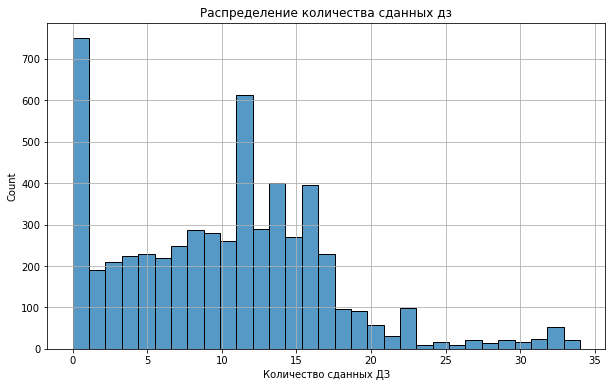

In [292]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Число сданных ДЗ ученика на курсе')
plt.title('Распределение количества сданных дз')
plt.xlabel('Количество сданных ДЗ')
plt.grid(True)
plt.show()

- видим, что большинство пользователей не сдает дз
- после тех пользователей, кто совсем не сдает дз, достаточно часто встречаются те, у кого сдано 9 дз
- встречаются пользователи с количеством решенных дз на курсе больше 30 (🤯)

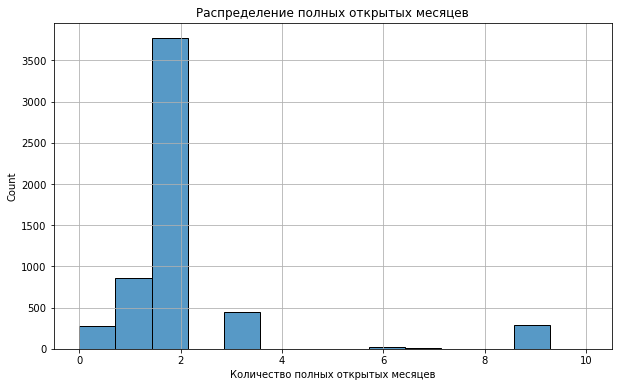

In [294]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Сколько полных месяцев курса открыто у ученика')
plt.title('Распределение полных открытых месяцев')
plt.xlabel('Количество полных открытых месяцев')
plt.grid(True)
plt.show()
# большинство открывает курс на 2 мес.

### 2. Поделить всех учеников на волны 
Критерии волн:
- 0 волна – присоединились на курс до даты старта курса включительно
- 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно
- 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса
- 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса
- 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса
- 5 волна - присоединились на курс от 4 недель после даты старта курса

In [299]:
df['days_after_start'] = (df['Дата открытия курса ученику'] - df['Дата старта курса']).dt.days
df

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе,days_after_start
0,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10001,Markova,Самара,1,2024-07-25 18:04:20,2,10,-53
1,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10006,Пушкина,Москва,1,2024-07-25 18:48:31,2,17,-53
2,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10009,Чернобель,Минеральные Воды,1,2024-07-26 06:05:09,2,16,-52
3,25,Годовой 2к25 стандарт,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,10011,Ищенко,Анива,1,2024-07-26 10:26:56,2,5,-53
4,18,Годовой 2к25 стандарт,Годовой,История,ЕГЭ,2024-09-18 00:00:00,10012,Вахрушева,Ижевск,1,2024-07-26 09:14:30,3,19,-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,17,Годовой 2к25 стандарт,Годовой,Английский язык,ЕГЭ,2024-09-20 00:00:00,10119,Сиротина,Москва,1,2024-07-28 08:33:57,1,0,-54
5710,86,Годовой 2к25 минимал,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,10452,Матвеева,NaN,1,2024-11-02 12:49:18,1,0,46
5711,21,Годовой 2к25 стандарт,Годовой,Химия,ЕГЭ,2024-09-16 00:00:00,10036,Цветаев,NaN,1,2024-09-15 11:34:03,1,0,-1
5714,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23 00:00:00,28341,Матвийчук,NaN,1,2024-09-24 22:44:04,1,0,1


In [300]:
# Функция для определения волны
def assign_wave(days):
    if days <= 0:
        return '0 волна'
    elif 0 < days <= 7:
        return '1 волна'
    elif 7 < days <= 14:
        return '2 волна'
    elif 14 < days <= 21:
        return '3 волна'
    elif 21 < days <= 28:
        return '4 волна'
    else:
        return '5 волна'

In [301]:
df['Волна'] = df['days_after_start'].apply(assign_wave)
df

,ID курса,Название курса,Тип курса,Предмет,Тип предмета,Дата старта курса,ID ученика,Фамилия ученика,Город ученика,Ученик не отчислен с курса,Дата открытия курса ученику,Сколько полных месяцев курса открыто у ученика,Число сданных ДЗ ученика на курсе,days_after_start,Волна
0,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10001,Markova,Самара,1,2024-07-25 18:04:20,2,10,-53,0 волна
1,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10006,Пушкина,Москва,1,2024-07-25 18:48:31,2,17,-53,0 волна
2,16,Годовой 2к25 стандарт,Годовой,Обществознание,ЕГЭ,2024-09-16 00:00:00,10009,Чернобель,Минеральные Воды,1,2024-07-26 06:05:09,2,16,-52,0 волна
3,25,Годовой 2к25 стандарт,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,10011,Ищенко,Анива,1,2024-07-26 10:26:56,2,5,-53,0 волна
4,18,Годовой 2к25 стандарт,Годовой,История,ЕГЭ,2024-09-18 00:00:00,10012,Вахрушева,Ижевск,1,2024-07-26 09:14:30,3,19,-54,0 волна
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,17,Годовой 2к25 стандарт,Годовой,Английский язык,ЕГЭ,2024-09-20 00:00:00,10119,Сиротина,Москва,1,2024-07-28 08:33:57,1,0,-54,0 волна
5710,86,Годовой 2к25 минимал,Годовой,Биология,ЕГЭ,2024-09-17 00:00:00,10452,Матвеева,NaN,1,2024-11-02 12:49:18,1,0,46,5 волна
5711,21,Годовой 2к25 стандарт,Годовой,Химия,ЕГЭ,2024-09-16 00:00:00,10036,Цветаев,NaN,1,2024-09-15 11:34:03,1,0,-1,0 волна
5714,38,Годовой курс 2к25,Годовой,Математика ОГЭ,ОГЭ,2024-09-23 00:00:00,28341,Матвийчук,NaN,1,2024-09-24 22:44:04,1,0,1,1 волна


In [304]:
df = df.drop('days_after_start', axis=1)

In [303]:
# Распределение по волнам
df['Волна'].value_counts().sort_index()

0 волна    2164
1 волна     795
2 волна     938
3 волна     953
4 волна     796
5 волна      26
Name: Волна, dtype: int64

In [305]:
df.to_csv('df_2_task.csv')